In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#here we load library 

In [3]:
data=pd.read_csv("ec2_cpu_utilization_fe7f93.csv")

In [5]:
data

,timestamp,value
0,2014-02-14 14:27:00,2.296
1,2014-02-14 14:32:00,2.144
2,2014-02-14 14:37:00,2.274
3,2014-02-14 14:42:00,2.066
4,2014-02-14 14:47:00,2.350
...,...,...
4027,2014-02-28 14:02:00,2.456
4028,2014-02-28 14:07:00,2.098
4029,2014-02-28 14:12:00,2.376
4030,2014-02-28 14:17:00,2.426


In [7]:
## Basic check

In [9]:
data.head()#first five rows

,timestamp,value
0,2014-02-14 14:27:00,2.296
1,2014-02-14 14:32:00,2.144
2,2014-02-14 14:37:00,2.274
3,2014-02-14 14:42:00,2.066
4,2014-02-14 14:47:00,2.350


In [11]:
data.tail() #last five rows

,timestamp,value
4027,2014-02-28 14:02:00,2.456
4028,2014-02-28 14:07:00,2.098
4029,2014-02-28 14:12:00,2.376
4030,2014-02-28 14:17:00,2.426
4031,2014-02-28 14:22:00,3.252


In [13]:
data.sample(5) #random data used

,timestamp,value
623,2014-02-16 18:22:00,3.236
3472,2014-02-26 15:47:00,1.878
583,2014-02-16 15:02:00,1.996
2565,2014-02-23 12:12:00,3.566
1244,2014-02-18 22:07:00,3.916


In [15]:
data.info() #infomation of data its object or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [17]:
data.describe()
#here we get min ,max ,mean value

,value
count,4032.000000
mean,5.778964
std,11.811689
min,1.800000
25%,2.178000
50%,2.582000
75%,3.425500
max,99.668000


In [19]:
data.isnull().sum()
#no data is null

timestamp    0
value        0
dtype: int64

In [21]:
# Basic checks

In [25]:
data=pd.read_csv('ec2_cpu_utilization_fe7f93.csv',parse_dates=[0],index_col='timestamp')

In [27]:
## EDA

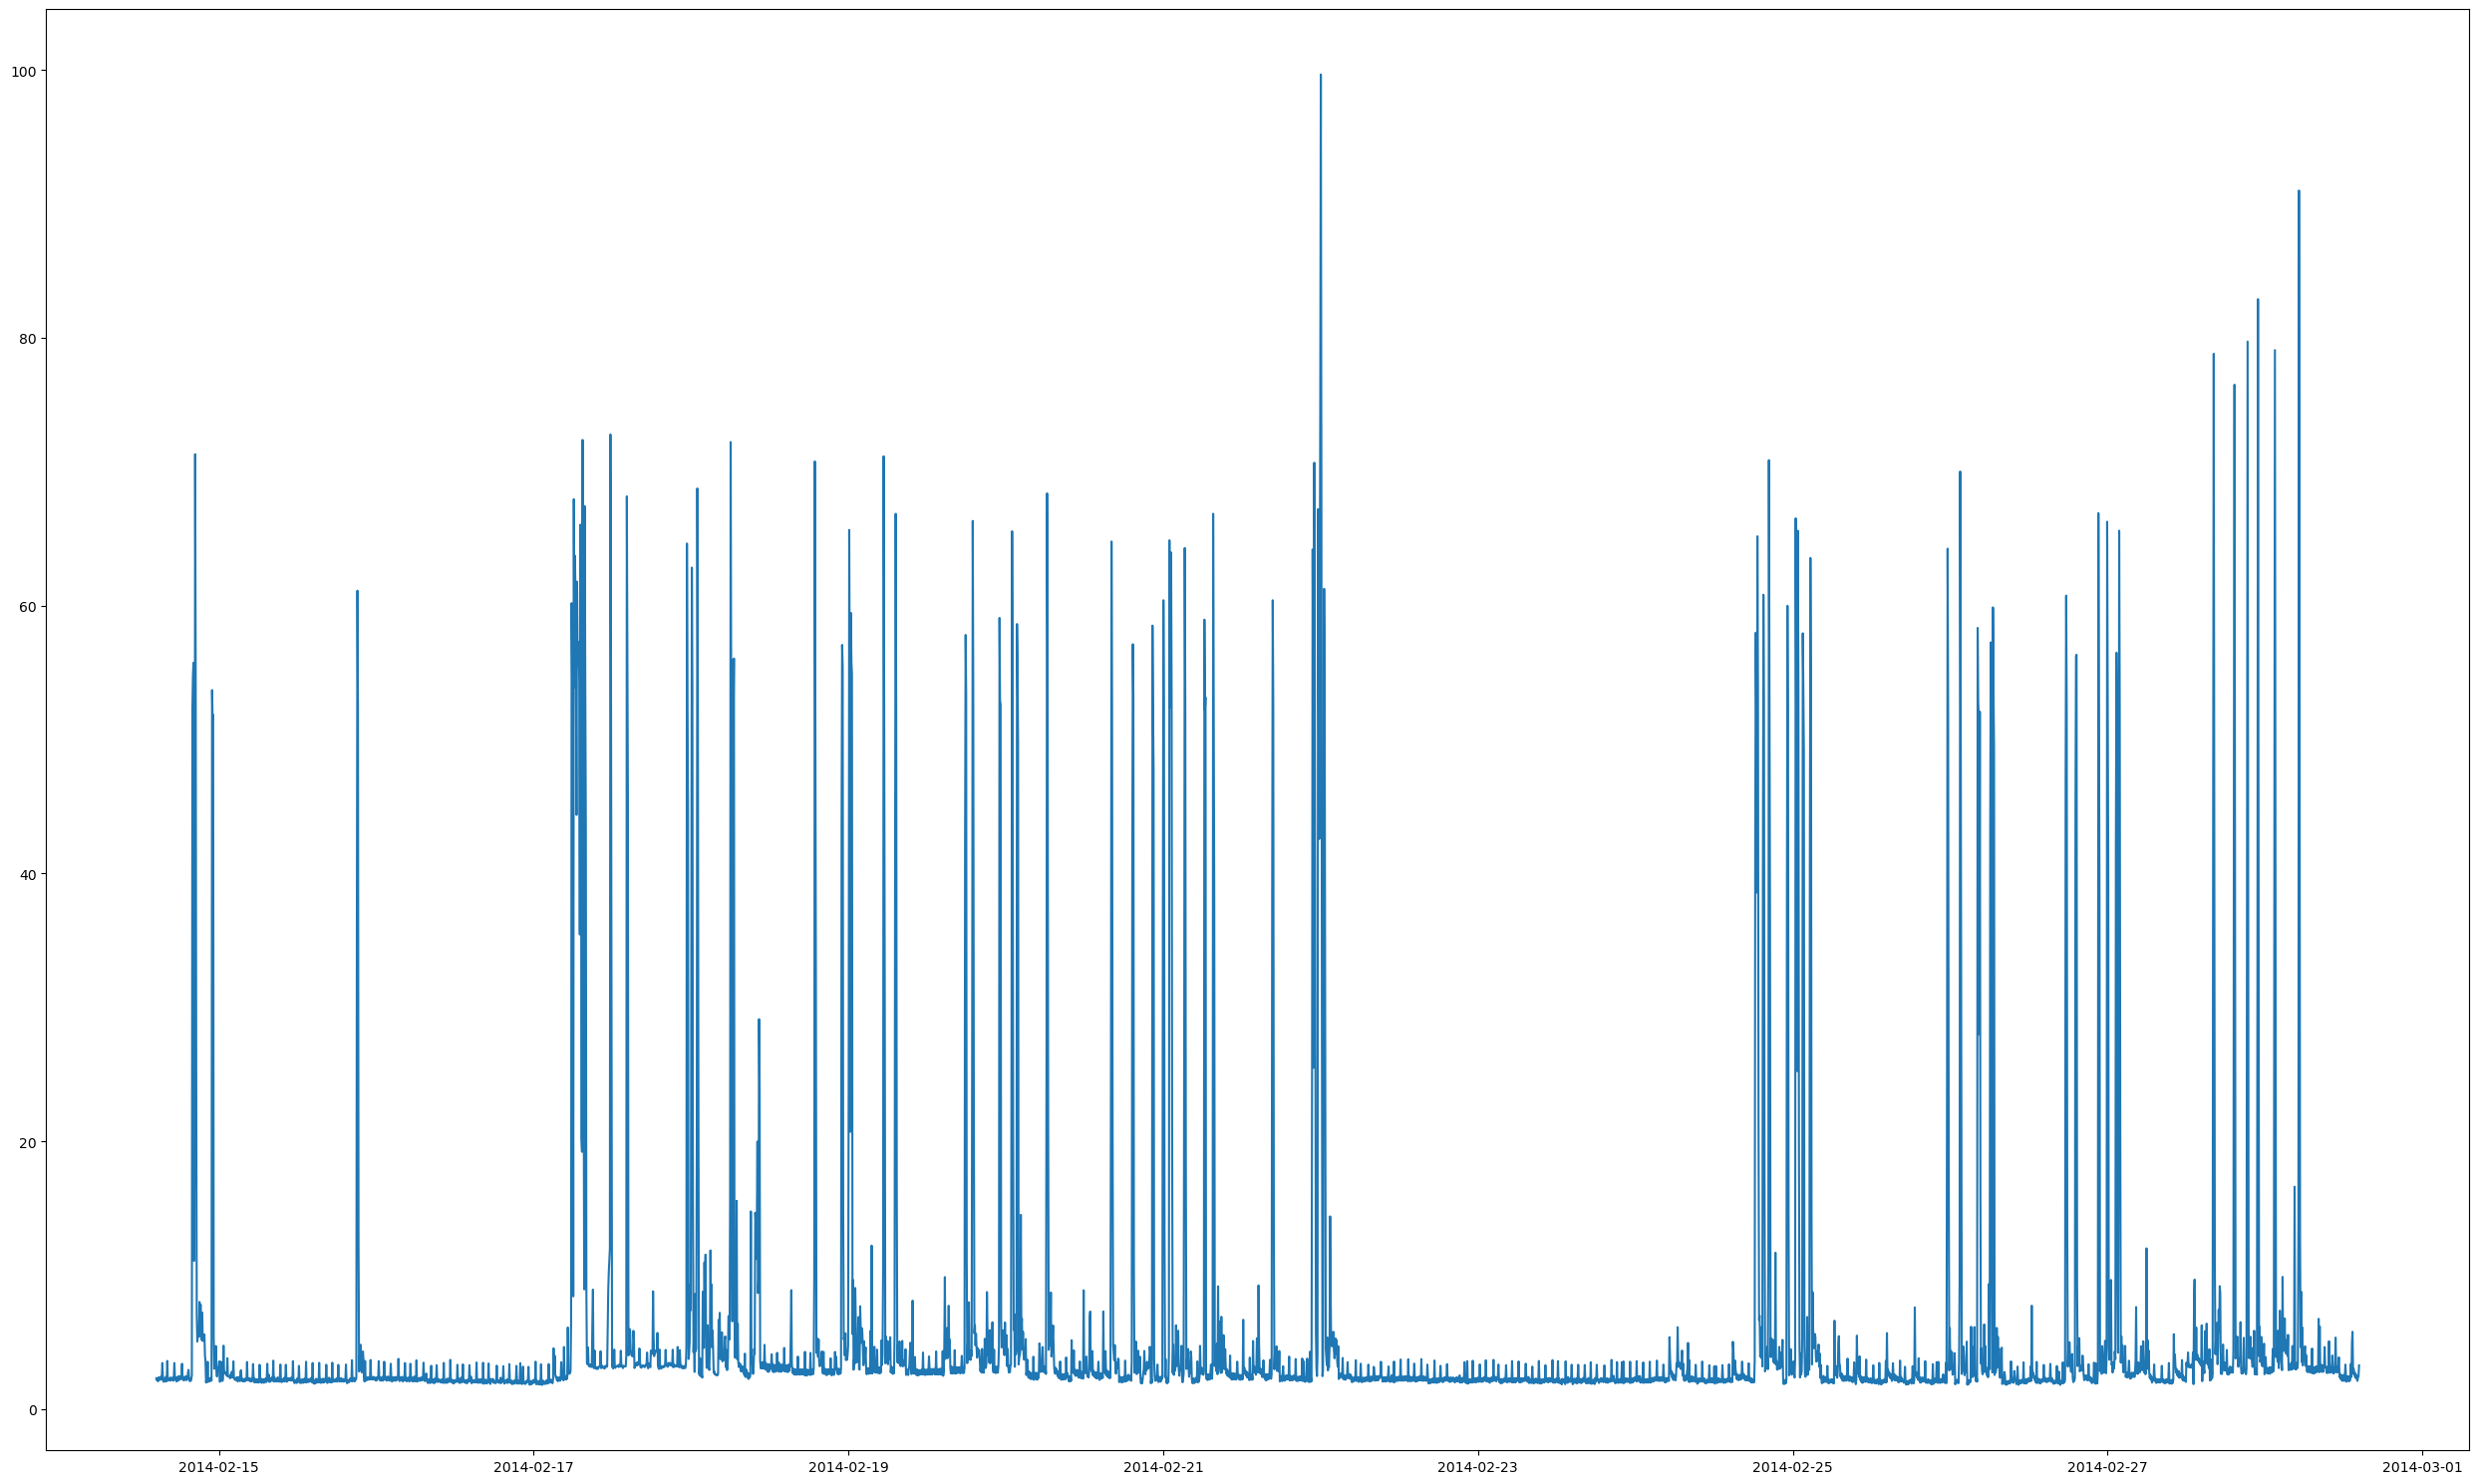

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(data)#line plot 
plt.tight_layout()

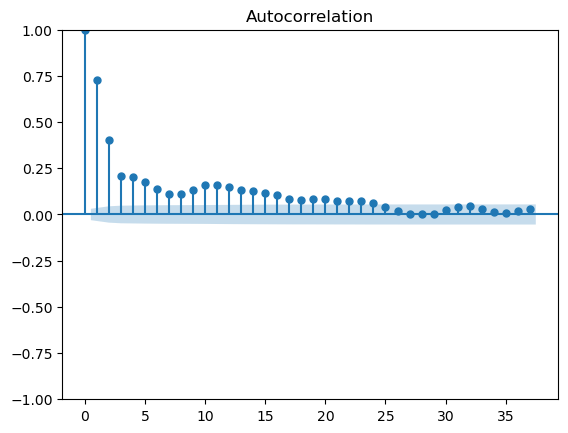

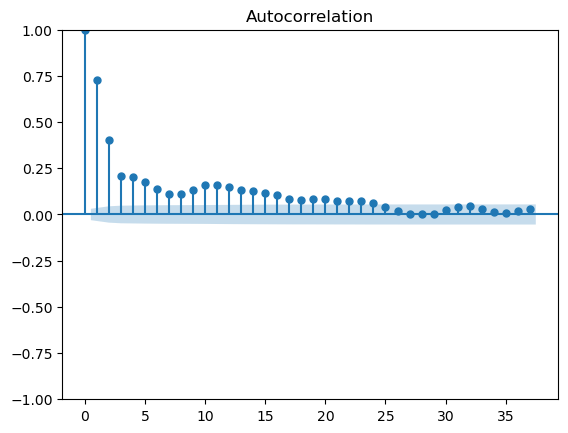

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

In [33]:
#From the autocorrelation plot, it is clear that given series is not stationary.

In [35]:
#We can perform the ADfuller test, a test based on hypothesis, where if the p-value is
#less than 0.05, then we can consider the time series is stationary, and if the P-value is
#greater than 0.05, then the time series is non-stationary.

In [37]:
# ADfuller Test to check stationarity 

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():print("\t",key, ": ", val)

1. ADF :  -10.604609749186874
2. P-Value :  6.047717222243946e-19
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 4014
5. Critical Values :
	 1% :  -3.4319801661169578
	 5% :  -2.862260318209578
	 10% :  -2.5671534329349024


In [39]:
#P-value is higher for our dataset, and we can say that the evidence of rejecting the null
#hypothesis is low; hence the time series is non-stationary.

In [41]:
data

,value
timestamp,
2014-02-14 14:27:00,2.296
2014-02-14 14:32:00,2.144
2014-02-14 14:37:00,2.274
2014-02-14 14:42:00,2.066
2014-02-14 14:47:00,2.350
...,...
2014-02-28 14:02:00,2.456
2014-02-28 14:07:00,2.098
2014-02-28 14:12:00,2.376


In [43]:
## making it stationary by taking difference of 1
data1=data.diff(periods=1) #This means calculating the change in your row(s)/column(s) over a set number of periods. Or simply, 
#pandas diff will subtract 1 cell value from another cell value within the same index.

In [45]:
data1 # Series integrated to the order of 1

,value
timestamp,
2014-02-14 14:27:00,NaN
2014-02-14 14:32:00,-0.152
2014-02-14 14:37:00,0.130
2014-02-14 14:42:00,-0.208
2014-02-14 14:47:00,0.284
...,...
2014-02-28 14:02:00,0.194
2014-02-28 14:07:00,-0.358
2014-02-28 14:12:00,0.278


In [47]:
data1=data1.iloc[1:] #null value discarded
data1

,value
timestamp,
2014-02-14 14:32:00,-0.152
2014-02-14 14:37:00,0.130
2014-02-14 14:42:00,-0.208
2014-02-14 14:47:00,0.284
2014-02-14 14:52:00,-0.214
...,...
2014-02-28 14:02:00,0.194
2014-02-28 14:07:00,-0.358
2014-02-28 14:12:00,0.278


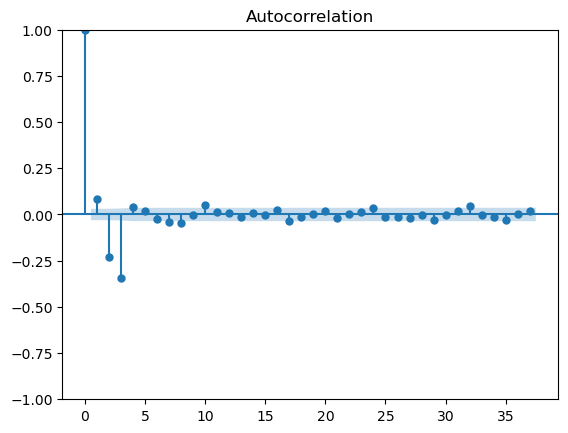

In [49]:
plot_acf(data1); # autocorrelation plot 

In [51]:
data2=data1.diff(periods=1) # differencing applied to data1

In [53]:
data2=data2.iloc[1:] # integrated to the order of 2

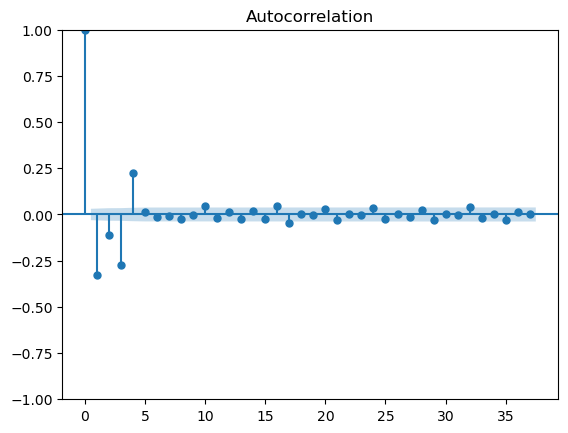

In [55]:
plot_acf(data2);

In [57]:
data2.shape#shape of the data rows and columns

(4030, 1)

In [59]:
## Creating training and test sets
train=data2[:100] #from 0th row to 99th row - traning data
test=data2[100:] #from 100th row to end - testing data

In [61]:
test.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3930 entries, 2014-02-14 22:57:00 to 2014-02-28 14:22:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   3930 non-null   float64
dtypes: float64(1)
memory usage: 61.4 KB


In [63]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [65]:

#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data1,maxlag=15,glob=True)
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

[2, 3, 5, 6, 7, 8, 9, 11]

In [73]:
## model creation
ar_model=AutoReg(train,lags=[2, 3, 5, 6, 7, 8, 9, 11]) ## object creation with lags specified
ar_model_fit=ar_model.fit() #training the model

In [75]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)

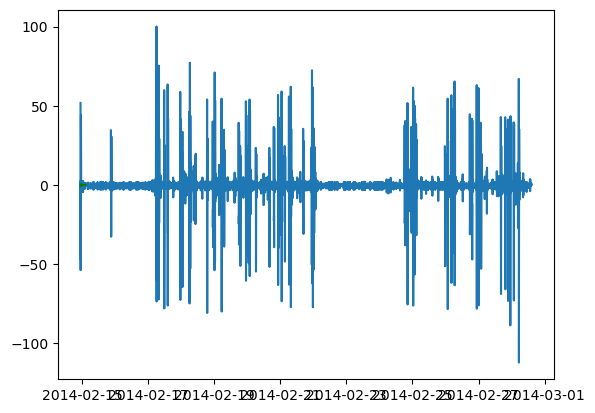

In [77]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [79]:
## ARIMA Model

In [81]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [83]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))#order= p,d,q

model_arima_fit = model_arima.fit()#training

In [85]:
## evaluate the model
print(model_arima_fit.aic)

857.982937602251


In [87]:
## predicting the output of sample points
# predictions = model_arima_fit.forecast(steps=9)
prediction=model_arima_fit.predict(start=1,end=142)

In [89]:
prediction

2014-02-14 14:42:00    0.281943
2014-02-14 14:47:00   -0.042211
2014-02-14 14:52:00    0.096024
2014-02-14 14:57:00   -0.025691
2014-02-14 15:02:00   -0.005409
                         ...   
2014-02-15 02:07:00   -0.157310
2014-02-15 02:12:00   -0.157310
2014-02-15 02:17:00   -0.157310
2014-02-15 02:22:00   -0.157310
2014-02-15 02:27:00   -0.157310
Freq: 5min, Name: predicted_mean, Length: 142, dtype: float64

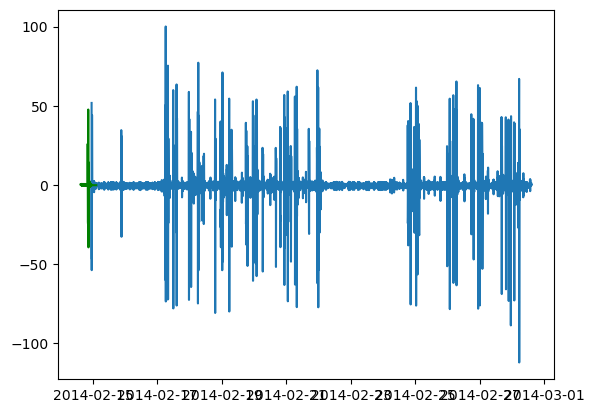

In [91]:
plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

In [93]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)#values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [95]:
#The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)

(0, 0, 0) 799.5290714960628
(0, 0, 1) 741.3038946943707
(0, 0, 2) 742.2890873901997
(0, 0, 3) 728.3354315007558
(0, 0, 4) 727.2902349558217
(0, 1, 0) 881.8793161204144
(0, 1, 1) 797.1740706204483
(0, 1, 2) 745.0185045766044
(0, 1, 3) 745.4933810286972
(0, 1, 4) 734.4398200121914
(0, 2, 0) 980.4571043153865
(0, 2, 1) 880.5813808365687
(0, 2, 2) 801.0723294551317
(0, 2, 3) 755.8640650030845
(0, 2, 4) 755.5618353725549
(0, 3, 0) 1086.8036510125937
(0, 3, 1) 978.0469459556906
(0, 3, 2) 883.225742184544
(0, 3, 3) 808.7667959872118
(0, 3, 4) 772.5686225876868
(0, 4, 0) 1196.465175710001
(0, 4, 1) 1083.1151945842662
(0, 4, 2) 979.348775334563
(0, 4, 3) 889.2492976096422
(0, 4, 4) 822.3812872437436
(1, 0, 0) 794.7318755119428
(1, 0, 1) 743.0158432835411
(1, 0, 2) 741.560813131953
(1, 0, 3) 729.1344422632243
(1, 0, 4) 732.2379962833509
(1, 1, 0) 857.982937602251
(1, 1, 1) 792.8902805801871
(1, 1, 2) 746.5271770728469
(1, 1, 3) 748.2030606787156
(1, 1, 4) 749.2602154021702
(1, 2, 0) 930.91651406

In [96]:
min(list2)  # lowest aic score

718.6975693877489

In [97]:
loc=list2.index(min(list2))
loc

103

In [101]:
# pdq corresponding to lowest aic
list1[loc]

(4, 0, 3)

In [103]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [105]:
print(model_arima_fit.aic) # confirm aic score

718.6975693877489


In [107]:
forecast = model_arima_fit.forecast(steps=9)
forecast

2014-02-14 22:57:00   -0.237015
2014-02-14 23:02:00   -0.025223
2014-02-14 23:07:00    0.346994
2014-02-14 23:12:00    0.029008
2014-02-14 23:17:00   -0.256971
2014-02-14 23:22:00   -0.008435
2014-02-14 23:27:00    0.062194
2014-02-14 23:32:00    0.072782
2014-02-14 23:37:00   -0.025755
Freq: 5min, Name: predicted_mean, dtype: float64

In [109]:
prediction=model_arima_fit.predict(start=1,end=142)

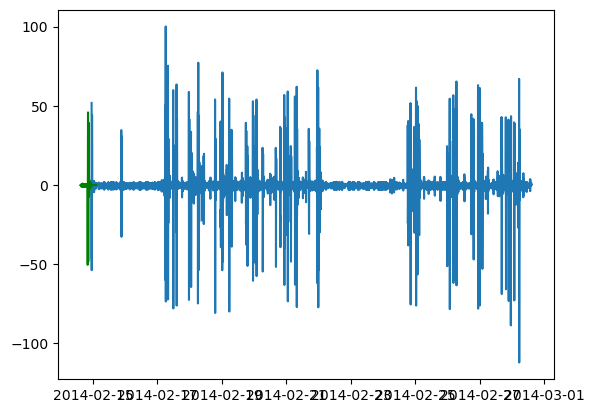

In [111]:
plt.plot(test)
plt.plot(prediction,color='green')

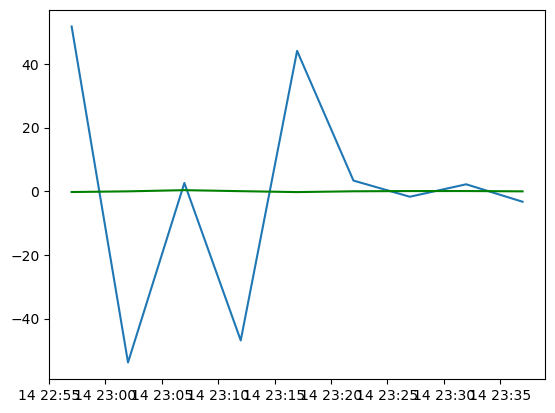

In [113]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [115]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()
test1

array([ 51.776, -53.794,   2.61 , -46.862,  44.108,   3.352,  -1.72 ,
         2.192,  -3.29 ,   1.398,   1.124,  -0.958,   0.516,   0.228,
        -1.994,   1.552,   1.44 ,  -2.734,   1.286,  -0.224,   0.346,
         2.352,  -4.592,   2.228,  -0.198])

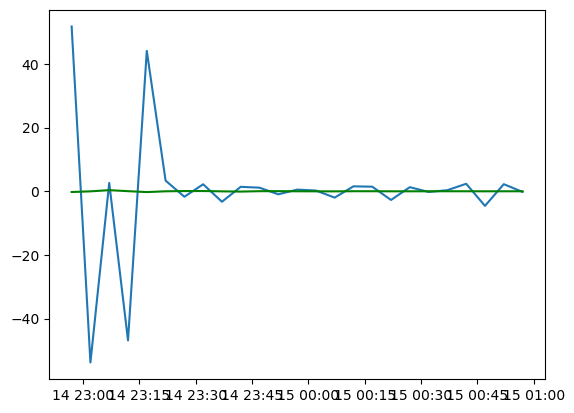

In [117]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [119]:
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 394.08074699732026,
 'mae': 9.322299443355732,
 'rmse': 19.851467124555814}

In [121]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test1, forecast25))
  
# Calculate mean squared error
mean_squared_error(test1, forecast25)

19.851467124555814


394.08074699732026

# Conclusion